In [ ]:
! pip install opensmile
! pip install librosa

"""### Get featires values with time stamp"""

from google.colab import drive
drive.mount('/content/drive')

import opensmile
import numpy as np
import librosa

# Initialize OpenSMILE
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
    #config_file_path="path_to_your_config_file.conf"
)

# Load the audio signal (replace with your own loading mechanism)
#audio_path = '/content/drive/MyDrive/FYP_dataset/new_song_feature_extraction/2.mp3'
#signal, sr= smile.process_file('/content/drive/MyDrive/FYP_dataset/CNN Features/abc.wav')
audio_path = '/content/drive/MyDrive/FYP_dataset/models/audio/Coldplay_BTS_My_Universe.mp3'

signal, sr = librosa.load(audio_path, sr=None)

# Segment the audio signal into 0.5-second segments
segment_duration = 2
samples_per_segment = int(segment_duration * sr)
timestamps = np.arange(0, len(signal) / sr, segment_duration)
segments = [signal[i:i + samples_per_segment] for i in range(0, len(signal), samples_per_segment)]

# Initialize a list to store features
features = []

# Extract features and timestamps for each segment
for timestamp, segment in zip(timestamps, segments):
    feature_dict = smile.process_signal(segment, sr)
    feature_dict['timestamp'] = timestamp  # Add the timestamp to the feature dictionary
    features.append(feature_dict)

# Print the extracted features and timestamps for the first segment
#print("Extracted features:", features[0])

import pandas as pd
import numpy as np
import glob
# Define the path to the directory containing the feature files
directory_path = '/content/drive/MyDrive/FYP_dataset/features'

# Get a list of all feature file paths in the directory
feature_files = glob.glob(directory_path + '/*.csv')

# Read the feature file into a DataFrame
df = pd.read_csv(feature_files[0])

dataset_column_names = list(df.columns.drop(['Arousal_Value', 'Valence_Value', 'frameTime']))

print(dataset_column_names)
print(len(dataset_column_names))

time_array=[]
full_song_values=[]
full_song_features=[]


for index in range(0,len(features)):

  key_list=[]
  value_list=[]

  for key, value in features[index].items():
    #print(f"Key: {key}, Value: {value[0]}")
    key_list.append(key)
    value_list.append(value[0])

  song_features_at_time=[]
  song_values_at_time=[]
  time_stamp=value_list[len(value_list)-1]
  time_array.append(time_stamp)

  for k in range(0,len(dataset_column_names)):
    for j in range(0,len(key_list)):
     if(dataset_column_names[k]==key_list[j]):
       song_features_at_time.append(key_list[j])
       song_values_at_time.append(value_list[j])
       break

  full_song_values.append( song_values_at_time)
  full_song_features.append (song_features_at_time)

print(time_array)
print(full_song_values)
print(full_song_features)

print(len(time_array))
print(len(full_song_values))
print(len(full_song_features))

print(time_array[1])
print(full_song_values[1])
print(full_song_features[1])

print(len(full_song_values[1]))
print(len(full_song_features[1]))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168841 sha256=b7048af814265acff68bdb8bdb7e3e71c9036984cc47be0d030b498485d2a3e8
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639
Mounted at /content/drive
['F0final_sma_stddev', 'F0final_sma_amean', 'voicingFinalUnclipped_sma_stddev', 'voicingFinalUnclipped_sma_amean', 'jitterLocal_sma_stddev', 'jitterLocal_s

In [ ]:
"""## Playing Audio"""

! pip install ipython

from IPython.display import Audio


# Play the audio
audio = Audio(audio_path)
display(audio)

In [ ]:



"""### Predict Emotion"""

import time
from tensorflow import keras


# Load the saved Arousal and Valence models
arousal_model = keras.models.load_model('/content/drive/MyDrive/FYP_dataset/models/arousal_model.h5')  # Replace with the actual path
valence_model = keras.models.load_model('/content/drive/MyDrive/FYP_dataset/models/valence_model.h5')  # Replace with the actual path


# Categorize emotional states based on Arousal and Valence values
def categorize_emotion(arousal_value,valence_value):
    if (arousal_value > 0) and (valence_value>0):
      return "Happy"

    elif (arousal_value > 0) and (valence_value <0):
      return "Angry"

    elif (arousal_value <0) and (valence_value <0):
      return "Sad"

    elif  (arousal_value <0) and (valence_value >0):
      return "Calm"

    else:
        return "Neutral"  # Handle other cases as needed

# Function to predict Arousal and Valence for a given set of features
def predict_emotion(features):
    arousal_value = arousal_model.predict(np.array([features]))[0][0]
    valence_value = valence_model.predict(np.array([features]))[0][0]
    return arousal_value,valence_value

In [ ]:
# Lists to store data for plotting
timestamps = []
emotions = []

# Process audio features and predictions at 0.5-second intervals
for i in range(1,len(full_song_values)):


    time_stamp = time_array[i]
    song_values_at_time =full_song_values[i]


    arousal,valence = predict_emotion(song_values_at_time)
    emotion = categorize_emotion(arousal,valence)

    # Append data to lists for plotting
    timestamps.append(time_stamp)
    emotions.append(emotion)

    print(f"Timestamp: {time_stamp}    ",  f"Arousal: {arousal}   ", f"Valence: {valence}   ", f"Emotion: {emotion}")
   # print(f"Arousal: {arousal}")
    #print(f"Valence: {valence}")
    #print(f"Emotion: {emotion}")


    time.sleep(2)

1/1 [==============================] - 0s 266ms/step
Timestamp: 2.0     Arousal: 0.06467363238334656    Valence: -0.047487176954746246    Emotion: Angry
1/1 [==============================] - 0s 26ms/step
Timestamp: 4.0     Arousal: 0.03500339761376381    Valence: 0.04207912087440491    Emotion: Happy
1/1 [==============================] - 0s 16ms/step
Timestamp: 6.0     Arousal: 0.02813144400715828    Valence: 0.04207912087440491    Emotion: Happy
1/1 [==============================] - 0s 17ms/step
Timestamp: 8.0     Arousal: 0.022650834172964096    Valence: 0.037887901067733765    Emotion: Happy
1/1 [==============================] - 0s 18ms/step
Timestamp: 10.0     Arousal: 0.016986995935440063    Valence: 0.03911365941166878    Emotion: Happy
1/1 [==============================] - 0s 17ms/step
Timestamp: 12.0     Arousal: 0.22107672691345215    Valence: 0.055336348712444305    Emotion: Happy
1/1 [==============================] - 0s 18ms/step
Timestamp: 14.0     Arousal: -0.1752414

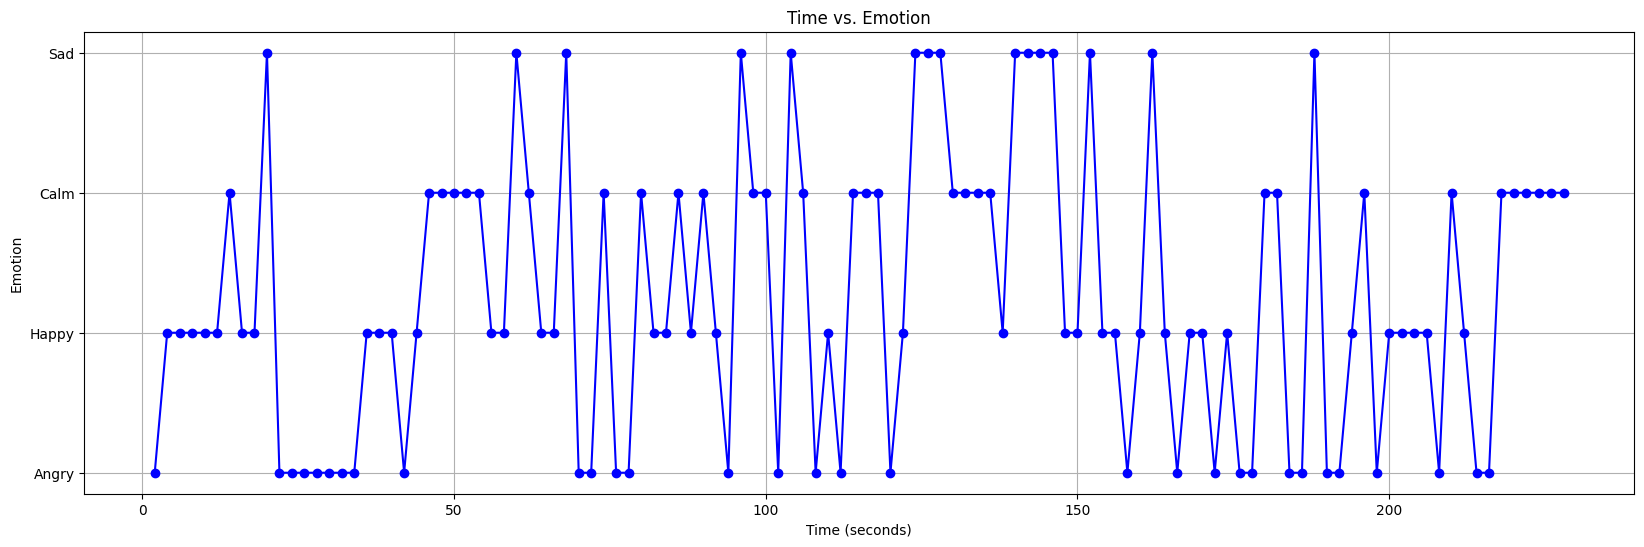

In [ ]:
import matplotlib.pyplot as plt

# Create a plot of time vs. emotion
plt.figure(figsize=(20, 6))
plt.plot(timestamps, emotions, marker='o', linestyle='-', color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Emotion')
plt.title('Time vs. Emotion')
plt.grid(True)
plt.show()

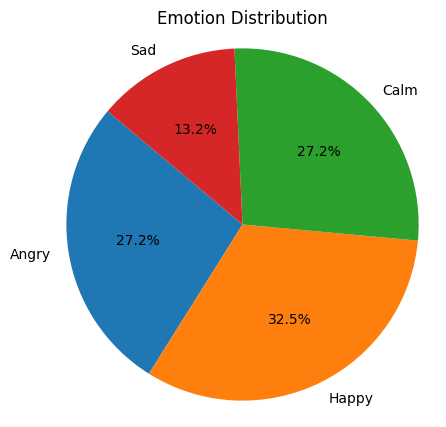

In [ ]:
# Calculate the distribution of emotions
emotion_counts = {}
for emotion in emotions:
    if emotion in emotion_counts:
        emotion_counts[emotion] += 1
    else:
        emotion_counts[emotion] = 1

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()
